In [1]:
import pandas as pd
import geopandas
import numpy as np
import seaborn as sns

from shapely.geometry import Point
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
sns.set()

In [4]:
# matplotlib.rcParams['figure.figsize'] = [10, 6]

In [5]:
shapefile = geopandas.read_file("./PHGE71FL/PHGE71FL.shp")

In [6]:
shapefile.crs = {'init' :'epsg:4326'}

In [7]:
shapefile.crs

{'init': 'epsg:4326'}

In [8]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [9]:
world.crs = {'init': 'epsg:4326'}

In [10]:
sh = shapefile.to_crs(world.crs)

In [12]:
shapefile.shape

(1250, 21)

<IPython.core.display.Javascript object>


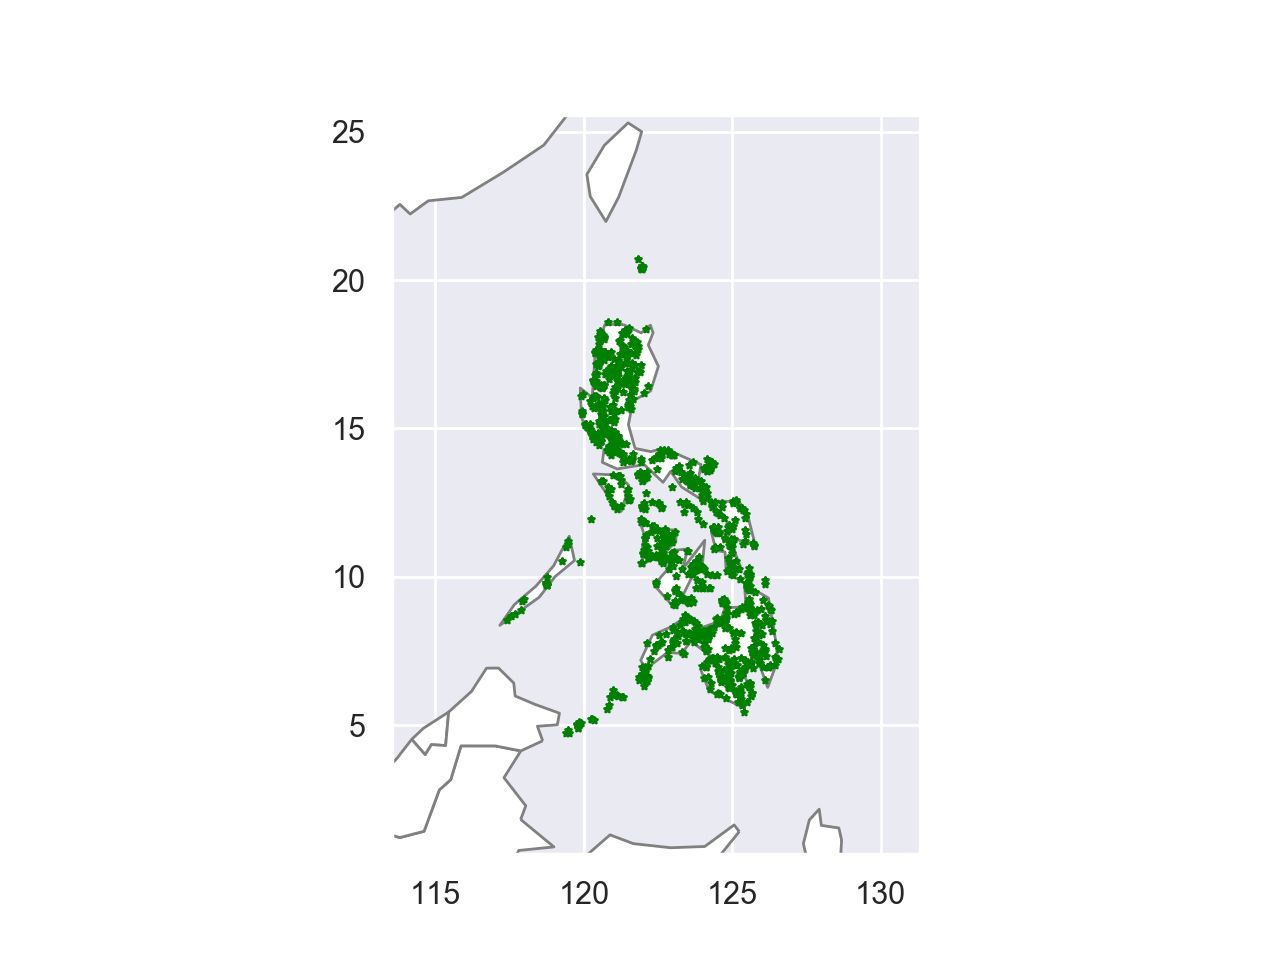

In [11]:
base = world[world.continent == 'Asia'].plot(
    color='white', edgecolor='grey')
shapefile.plot(ax=base, marker='*', color='green', markersize=5)

In [15]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [16]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

In [17]:
world.plot(column='gdp_per_cap');

In [18]:
shapefile.columns

Index(['DHSID', 'DHSCC', 'DHSYEAR', 'DHSCLUST', 'CCFIPS', 'ADM1FIPS',
       'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS', 'ADM1NAME',
       'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM', 'LONGNUM',
       'ALT_GPS', 'ALT_DEM', 'DATUM', 'geometry'],
      dtype='object')

In [19]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [20]:
world.crs

{}

In [21]:
cities.crs

{}

In [22]:
cities.plot(marker='*', color='green', markersize=5);

In [23]:
base = world.plot(color='white', edgecolor='black')

In [24]:
cities.plot(ax=base, marker='o', color='red', markersize=5);

In [39]:
world.plot(ax=ax, color='white', edgecolor='black')

<Figure size 720x432 with 0 Axes>

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
# cities = cities.to_crs(world.crs)

fig, ax = plt.subplots()
ax.set_aspect('equal')
world.plot(ax=ax, color='white', edgecolor='black')
cities.plot(ax=ax, marker='o', color='red', markersize=5)

NameError: name 'gpd' is not defined

<IPython.core.display.Javascript object>


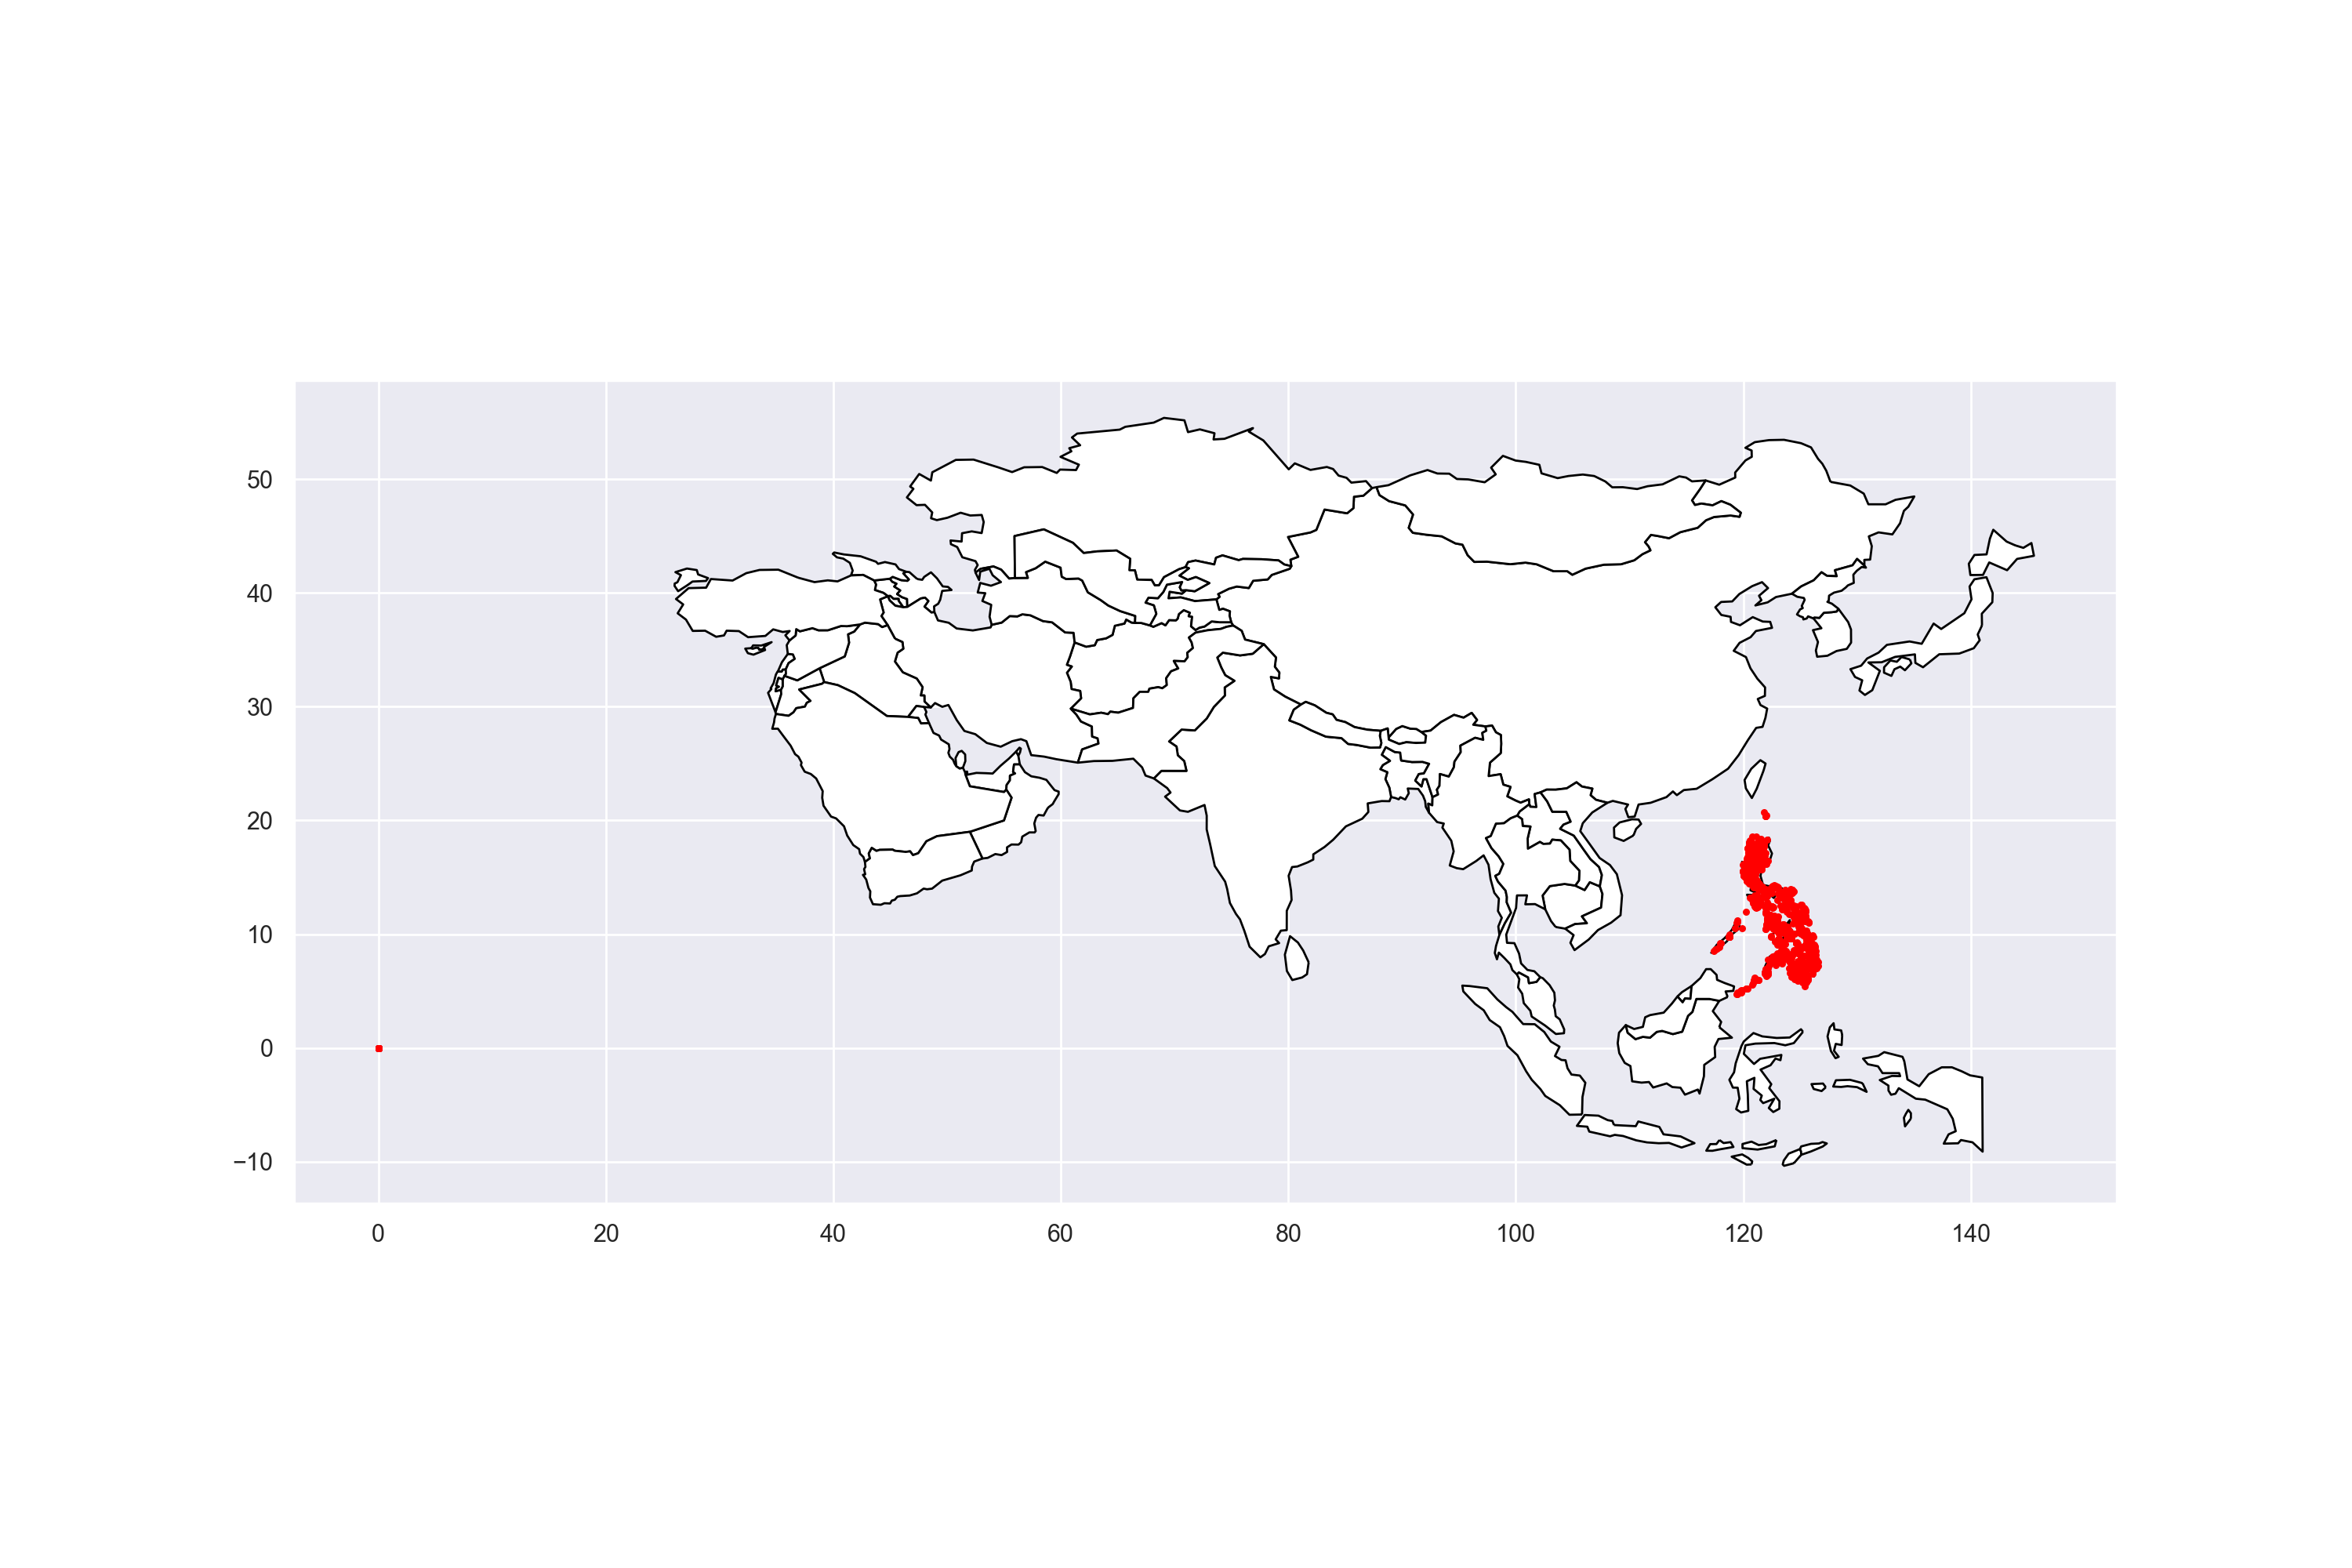

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_aspect('equal')
world[world.continent == 'Asia'].plot(ax=ax, color='white', edgecolor='black')
shapefile.plot(ax=ax, marker='o', color='red', markersize=5)

In [16]:
shapefile.head()

,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,...,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry
0,PH201700000386,PH,2017.0,386.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.271892,120.564542,9999.0,17.0,WGS84,POINT (120.56454229 18.2718920623)
1,PH201700000387,PH,2017.0,387.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,U,18.202195,120.568506,9999.0,10.0,WGS84,POINT (120.568506409 18.2021947961)
2,PH201700000388,PH,2017.0,388.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.073914,120.691113,9999.0,39.0,WGS84,POINT (120.691112849 18.0739141937)
3,PH201700000389,PH,2017.0,389.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.061017,120.510203,9999.0,13.0,WGS84,POINT (120.510203187 18.061016514)
4,PH201700000390,PH,2017.0,390.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.155694,120.663074,9999.0,126.0,WGS84,POINT (120.663073749 18.1556941707)


In [13]:
df = pd.read_stata("./PHIR70DT/PHIR70FL.DTA", convert_categoricals=False)

In [33]:
boundaries = geopandas.read_file("./shps/sdr_subnational_boundaries.shp")

In [27]:
boundaries.count()

ISO           17
FIPS          17
DHSCC         17
SVYTYPE       17
SVYYEAR       17
CNTRYNAMEE    17
CNTRYNAMEF     0
CNTRYNAMES     0
DHSREGEN      17
DHSREGFR       0
DHSREGSP       0
SVYID         17
REG_ID        17
Svy_Map       17
MULTLEVEL     17
LEVELRNK      17
REGVAR        17
REGCODE       17
REGNAME       17
OTHREGVAR     17
OTHREGCO      17
OTHREGNA      17
LEVELCO       17
LEVELNA       17
REPALLIND     17
REGNOTES       0
SVYNOTES      17
geometry      17
dtype: int64

In [26]:
boundaries.DHSREGEN.count()

17

<IPython.core.display.Javascript object>


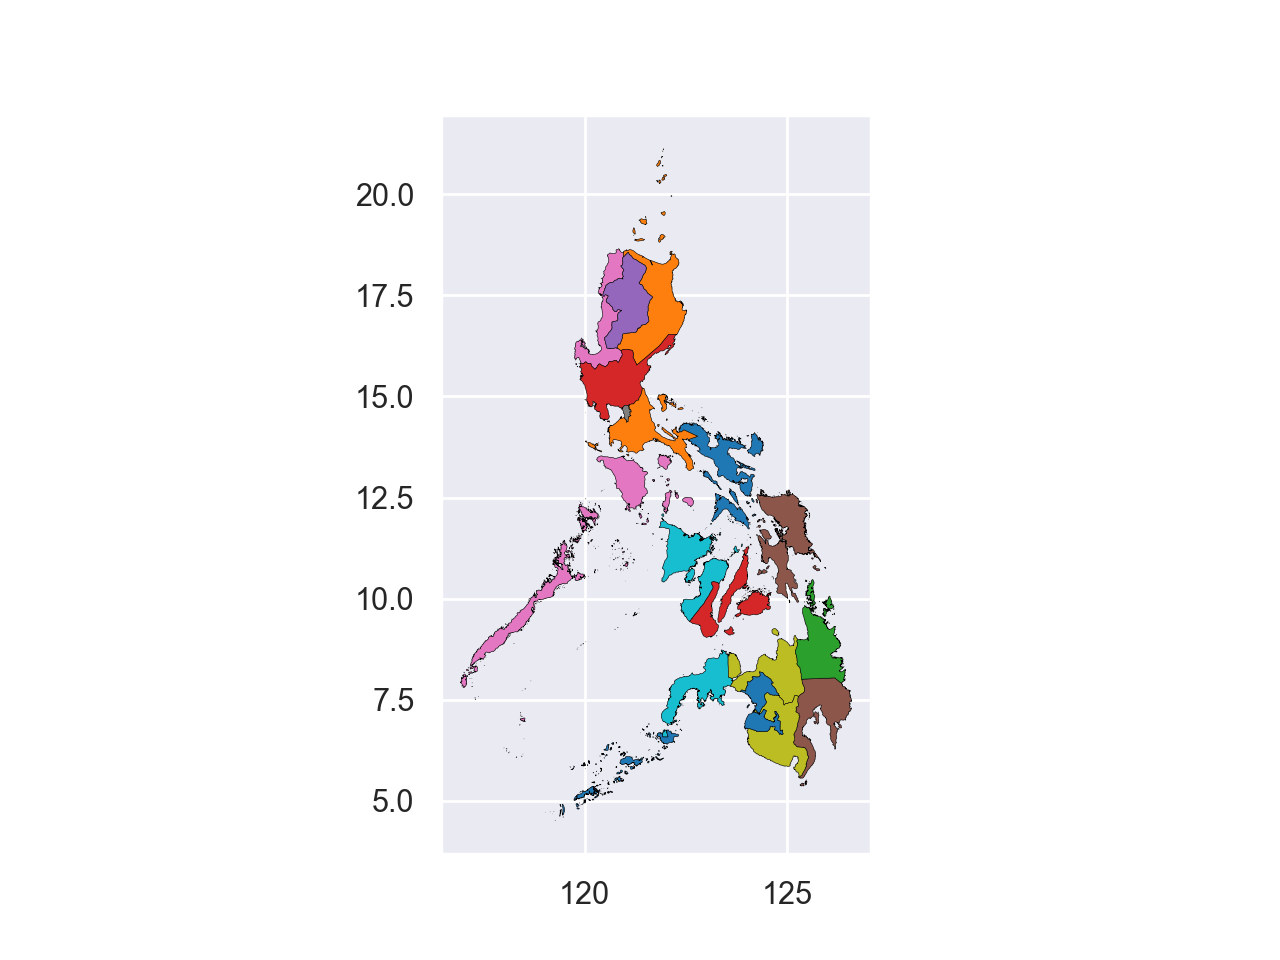

In [34]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
# world[world.continent == 'Asia'].plot(ax=ax, color='white', edgecolor='black')
boundaries.plot(ax=ax, edgecolor="black", linewidth=0.2, column="DHSREGEN")

In [38]:
boundaries.keys()

Index(['ISO', 'FIPS', 'DHSCC', 'SVYTYPE', 'SVYYEAR', 'CNTRYNAMEE',
       'CNTRYNAMEF', 'CNTRYNAMES', 'DHSREGEN', 'DHSREGFR', 'DHSREGSP', 'SVYID',
       'REG_ID', 'Svy_Map', 'MULTLEVEL', 'LEVELRNK', 'REGVAR', 'REGCODE',
       'REGNAME', 'OTHREGVAR', 'OTHREGCO', 'OTHREGNA', 'LEVELCO', 'LEVELNA',
       'REPALLIND', 'REGNOTES', 'SVYNOTES', 'geometry'],
      dtype='object')

In [75]:
shapefile.head()

,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,...,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry
0,PH201700000386,PH,2017.0,386.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.271892,120.564542,9999.0,17.0,WGS84,POINT (120.56454229 18.2718920623)
1,PH201700000387,PH,2017.0,387.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,U,18.202195,120.568506,9999.0,10.0,WGS84,POINT (120.568506409 18.2021947961)
2,PH201700000388,PH,2017.0,388.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.073914,120.691113,9999.0,39.0,WGS84,POINT (120.691112849 18.0739141937)
3,PH201700000389,PH,2017.0,389.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.061017,120.510203,9999.0,13.0,WGS84,POINT (120.510203187 18.061016514)
4,PH201700000390,PH,2017.0,390.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.155694,120.663074,9999.0,126.0,WGS84,POINT (120.663073749 18.1556941707)


In [76]:
df.head()

,caseid,v000,v001,v002,v003,v004,v005,v006,v007,v008,...,spregout_11,spregout_12,spregout_13,spregout_14,spregout_15,spregout_16,spregout_17,spregout_18,spregout_19,spregout_20
0,00010001 2,PH7,1,1,2,1,361799,8,2017,1412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00010001 7,PH7,1,1,7,1,361799,8,2017,1412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00010002 4,PH7,1,2,4,1,361799,8,2017,1412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00010004 2,PH7,1,4,2,1,361799,8,2017,1412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00010007 2,PH7,1,7,2,1,361799,8,2017,1412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.head().loc[['v116', 'v004']]

KeyError: "None of [Index(['v116', 'v004'], dtype='object')] are in the [index]"

In [78]:
shapefile.shape

(1250, 21)

In [39]:
df = pd.read_csv("./kiva_loans.csv")

In [40]:
df[df.country=="Philippines"].region.unique().shape

(3639,)

In [49]:
mpi_reg = pd.read_csv("./kiva/loan_themes_by_region.csv")

In [61]:
mpi_reg[mpi_reg.country=="Philippines"].dropna(subset=["geocode"]).head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
3324,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,"31 C, PENGUE RUYU, TUGUEGARAO CITY, CAGAYAN",NaN,PHL,...,400,"31 C, PENGUE RUYU, TUGUEGARAO CITY, CAGAYAN, P...","[(17.6422839, 121.739606)]",2; Pan-Philippine Highway; Tuguegarao City; Ca...,"(17.6422839, 121.739606)",17.642284,121.739606,"Cordillera Admin Region, Philippines","(17.3512542, 121.1718851)",84.0
3325,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,"69, TANZA, TUGUEGARAO CITY, CAGAYAN",NaN,PHL,...,400,"69, TANZA, TUGUEGARAO CITY, CAGAYAN, Philippines","[(17.6323524, 121.7416934)]",69; Cagayan Valley Road; Tuguegarao City; Caga...,"(17.6323524, 121.7416934)",17.632352,121.741693,"Cordillera Admin Region, Philippines","(17.3512542, 121.1718851)",84.0
3326,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,"A. Bonifacio, Diffun, Quirino",NaN,PHL,...,400,"A. Bonifacio, Diffun, Quirino, Philippines","[(16.6000004, 121.4666672)]",Diffun; Quirino; Philippines,"(16.6000004, 121.4666672)",16.600000,121.466667,"Cagayan Valley, Philippines","(16.9753758, 121.8107079)",84.0
3327,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,"Abolo, Amulung, Cagayan",NaN,PHL,...,6050,"Abolo, Amulung, Cagayan, Philippines","[(17.833334, 121.7333298)]",Amulung; Cagayan; Philippines,"(17.833334, 121.7333298)",17.833334,121.733330,"Cordillera Admin Region, Philippines","(17.3512542, 121.1718851)",84.0
3328,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,"Abra, Santiago City, Isabela",NaN,PHL,...,625,"Abra, Santiago City, Isabela, Philippines","[(16.7236824, 121.5179977)]",Santiago; Isabela; Cagayan Valley; Philippines,"(16.7236824, 121.5179977)",16.723682,121.517998,"Cagayan Valley, Philippines","(16.9753758, 121.8107079)",84.0


In [97]:
mpi_reg[mpi_reg.country=="Philippines"].dropna(subset=["geocode"]).geocode.apply(pd.eval).apply(lambda x: Point(*x[0]))

3324      POINT (17.6422839 121.739606)
3325     POINT (17.6323524 121.7416934)
3326     POINT (16.6000004 121.4666672)
3327      POINT (17.833334 121.7333298)
3328     POINT (16.7236824 121.5179977)
3329     POINT (16.5273162 121.6753626)
3330     POINT (17.8999996 121.6500015)
3331     POINT (17.3166676 121.7833328)
3333      POINT (17.3455928 121.548418)
3334      POINT (17.3455928 121.548418)
3335      POINT (17.3455928 121.548418)
3337     POINT (16.7080135 121.4941738)
3338     POINT (16.7080135 121.4941738)
3339     POINT (18.2911162 121.6824901)
3340     POINT (17.7337185 121.4770388)
3342       POINT (17.565729 121.694298)
3343       POINT (17.565729 121.694298)
3344     POINT (17.0990815 121.8505679)
3345     POINT (16.9583443 121.7808036)
3346     POINT (16.4017389 121.6254259)
3347     POINT (16.4017389 121.6254259)
3348     POINT (16.4017389 121.6254259)
3349        POINT (18.30735 121.659599)
3350     POINT (17.6333332 121.7833328)
3351      POINT (16.8599893 121.767985)


In [65]:
from shapely.geometry import Point
crs = {'init': 'epsg:2263'} #http://www.spatialreference.org/ref/epsg/2263/
mpi_reg.geocode.apply(lambda x: Point(*x))
# geometry = [Point(latlong) for latlong in zip(mpi_reg.lon, mpi_reg.lat)]
kiva_mpi_geo = geopandas.GeoDataFrame(mpi_reg, crs=crs, geometry="geocode")

TypeError: must be real number, not str

In [48]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [45]:
kiva_mpi_geo.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon,geometry
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995,POINT (70.81199529999998 36.7347725)
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538,POINT (63.76953839999999 35.1671339)
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754,POINT (69.28775350000001 35.80429470000001)
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537,POINT (66.8975372 36.7550603)
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210,POINT (67.8212104 34.8100067)


<IPython.core.display.Javascript object>


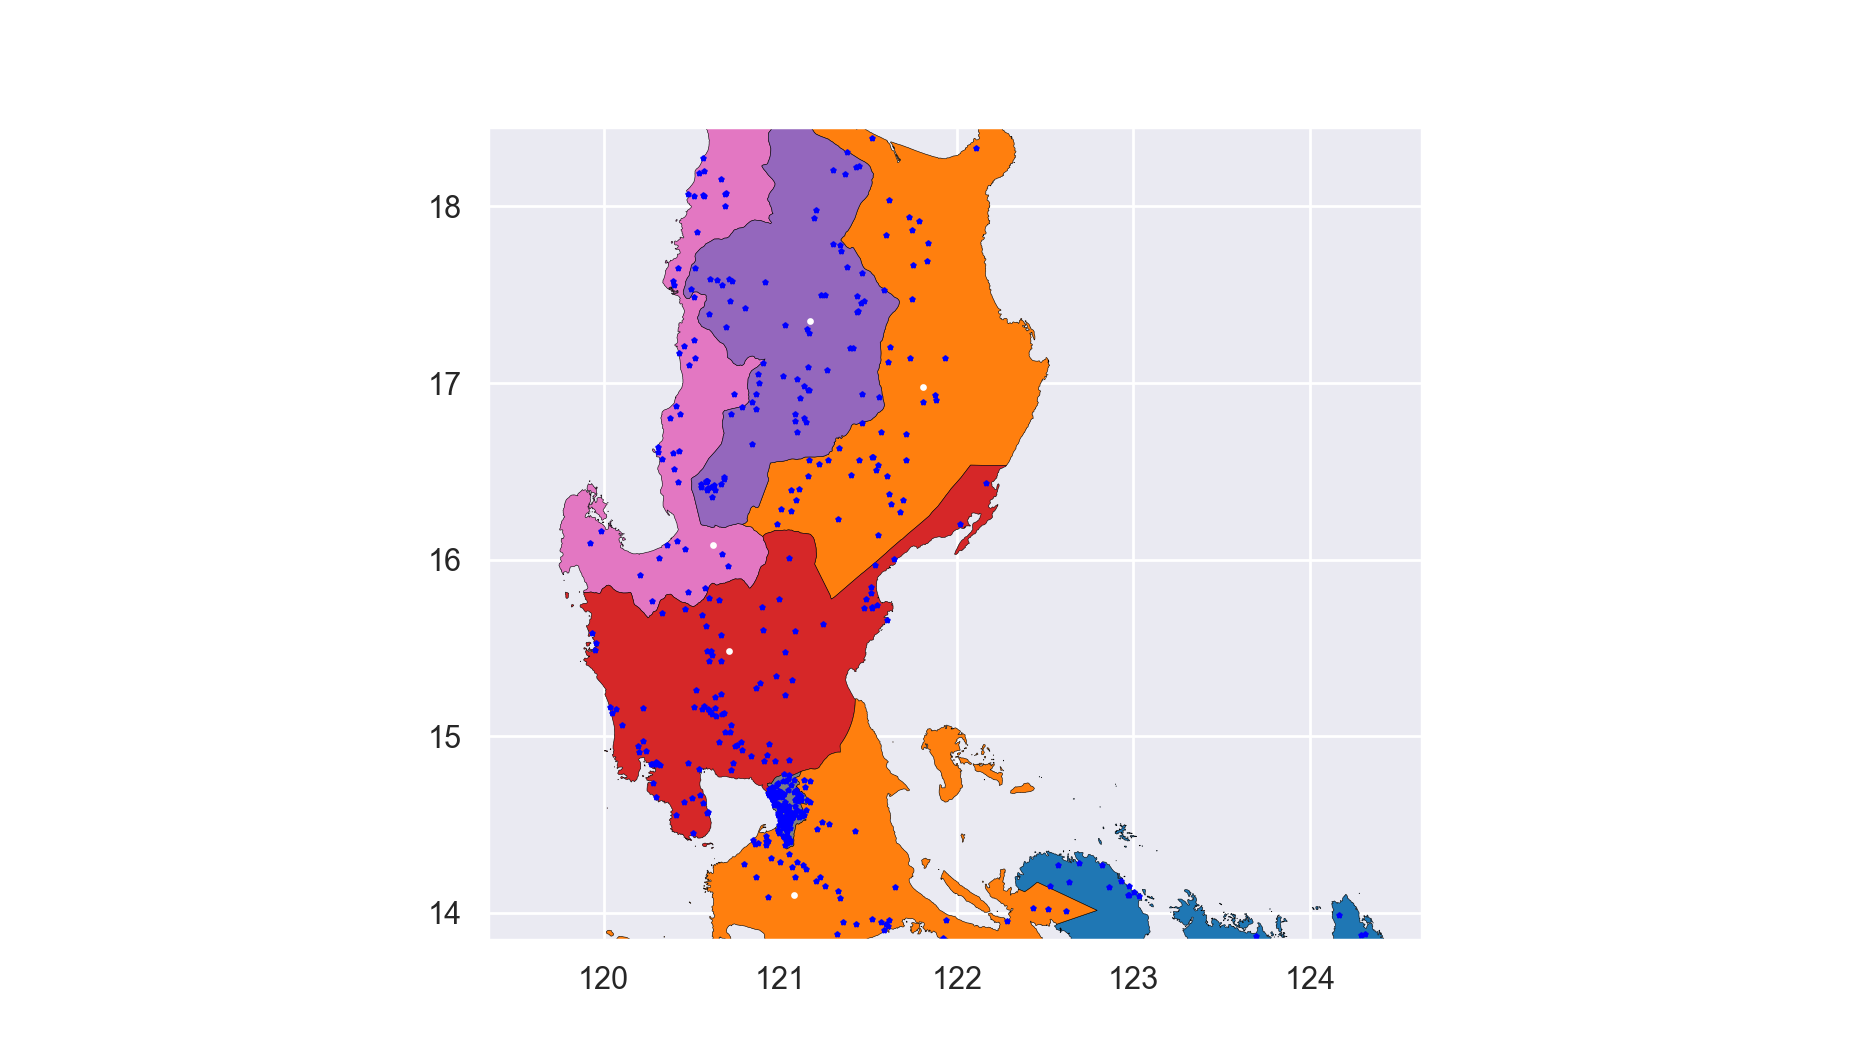

In [104]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
# ax.set_axis_off()
# boundaries.to_crs(kiva_mpi_geo.crs)
boundaries.plot(ax=ax, edgecolor="black", linewidth=0.2, column="DHSREGEN")
kiva_mpi_geo[kiva_mpi_geo.country=="Philippines"].plot(ax=ax, marker='o', color='white', markersize=2)
shapefile.plot(ax=ax, marker='*', color='blue', markersize=2, column="")


In [132]:
boundaries.REGCODE

0      1.0
1      2.0
2      3.0
3      5.0
4      6.0
5      7.0
6      8.0
7      9.0
8     10.0
9     11.0
10    12.0
11    16.0
12    13.0
13    14.0
14    15.0
15     4.0
16    17.0
Name: REGCODE, dtype: float64

In [133]:
surveys_to_boundaries = pd.merge(left=boundaries, right=df, left_on="REGCODE", right_on="v024")

In [156]:
smaller = surveys_to_boundaries.sample(500)

In [157]:
smaller['v171b'].apply(stats.mode)

23735    ([2], [1])
20719    ([1], [1])
16762    ([0], [1])
3730     ([3], [1])
19992    ([2], [1])
18263    ([3], [1])
3524     ([0], [1])
15077    ([1], [1])
22186    ([2], [1])
5972     ([3], [1])
17974    ([1], [1])
11822    ([0], [1])
8315     ([0], [1])
14967    ([2], [1])
21118    ([0], [1])
1062     ([2], [1])
3894     ([2], [1])
11827    ([0], [1])
9599     ([0], [1])
7216     ([2], [1])
24039    ([3], [1])
14927    ([3], [1])
9634     ([0], [1])
21659    ([0], [1])
6056     ([1], [1])
14574    ([3], [1])
24429    ([3], [1])
12761    ([3], [1])
23173    ([1], [1])
8236     ([2], [1])
            ...    
10582    ([3], [1])
16199    ([2], [1])
11897    ([0], [1])
11668    ([1], [1])
8189     ([3], [1])
19712    ([2], [1])
13507    ([0], [1])
16261    ([1], [1])
21219    ([0], [1])
20750    ([0], [1])
18513    ([3], [1])
11073    ([0], [1])
24644    ([0], [1])
1814     ([0], [1])
8983     ([3], [1])
13620    ([0], [1])
5527     ([2], [1])
13928    ([2], [1])
16168    ([3], [1])


<IPython.core.display.Javascript object>


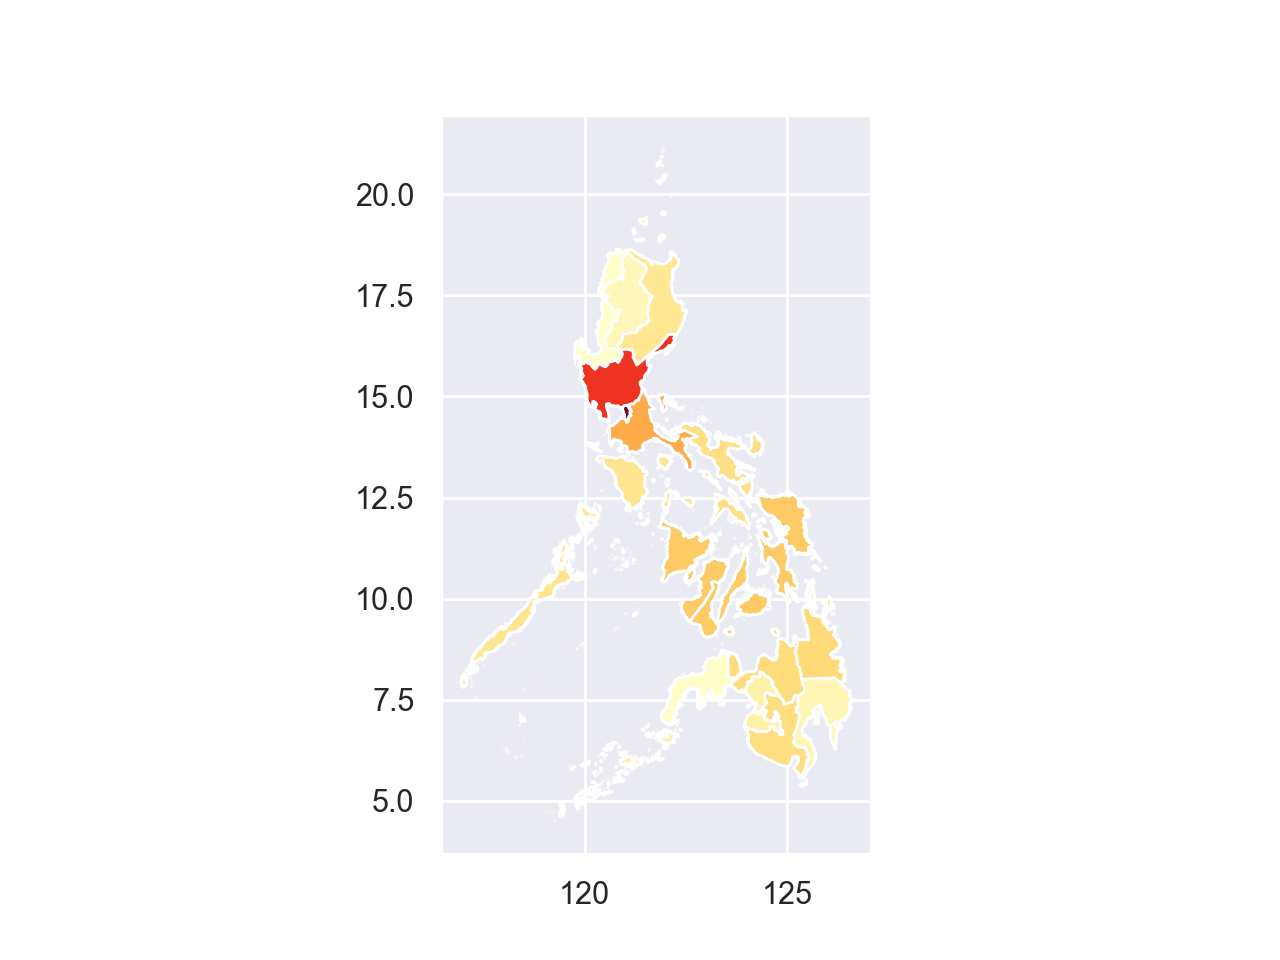

In [158]:
smaller.dissolve(by="REGCODE", aggfunc="sum").plot(column="v171b", cmap='YlOrRd')

In [119]:
shapefile

,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,...,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry
0,PH201700000386,PH,2017.0,386.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.271892,120.564542,9999.0,17.0,WGS84,POINT (120.56454229 18.2718920623)
1,PH201700000387,PH,2017.0,387.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,U,18.202195,120.568506,9999.0,10.0,WGS84,POINT (120.568506409 18.2021947961)
2,PH201700000388,PH,2017.0,388.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.073914,120.691113,9999.0,39.0,WGS84,POINT (120.691112849 18.0739141937)
3,PH201700000389,PH,2017.0,389.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.061017,120.510203,9999.0,13.0,WGS84,POINT (120.510203187 18.061016514)
4,PH201700000390,PH,2017.0,390.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.155694,120.663074,9999.0,126.0,WGS84,POINT (120.663073749 18.1556941707)
5,PH201700000391,PH,2017.0,391.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.598069,120.809959,9999.0,7.0,WGS84,POINT (120.809958614 18.5980694666)
6,PH201700000392,PH,2017.0,392.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.064437,120.562545,9999.0,24.0,WGS84,POINT (120.562544581 18.0644372882)
7,PH201700000393,PH,2017.0,393.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.005544,120.686633,9999.0,53.0,WGS84,POINT (120.686633458 18.0055436892)
8,PH201700000394,PH,2017.0,394.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.071912,120.690171,9999.0,29.0,WGS84,POINT (120.690170759 18.0719116079)
9,PH201700000395,PH,2017.0,395.0,NULL,NULL,NULL,NULL,NULL,1.0,...,1.0,Ilocos,GPS,R,18.191515,120.541437,9999.0,21.0,WGS84,POINT (120.54143737 18.1915145136)


In [121]:
df.v024.unique()

array([15,  9, 12, 14, 16, 13,  6,  7,  1,  2,  3,  4, 17,  5,  8, 10, 11])

In [161]:
hdi = pd.read_csv("./shdi.csv")

In [162]:
hdi.head()

,iso_code,ISO2,country,year,GDLCODE,level,region,shdi
0,AFG,AF,Afghanistan,2002,AFGr101,Subnat,Central (Kabul Wardak Kapisa Logar Parwan Panj...,0.454
1,AFG,AF,Afghanistan,2002,AFGr102,Subnat,Central Highlands (Bamyan Daikundi),0.385
2,AFG,AF,Afghanistan,2002,AFGr103,Subnat,East (Nangarhar Kunar Laghman Nooristan),0.386
3,AFG,AF,Afghanistan,2002,AFGr104,Subnat,North (Samangan Sar-e-Pul Balkh Jawzjan Faryab),0.356
4,AFG,AF,Afghanistan,2002,AFGr105,Subnat,North East (Baghlan Takhar Badakhshan Kunduz),0.364


In [163]:
hdi_shapes = geopandas.read_file("./GDL-SHDI-SHP-2/GDL-SHDI-SHP-2.shp")

In [182]:
hdi_ph_shapes = hdi_shapes[hdi_shapes.country=="Philippines"]

In [173]:
hdi_geo = pd.merge(left=hdi, right=hdi_shapes, left_on="GDLCODE", right_on="GDLCode")

<IPython.core.display.Javascript object>


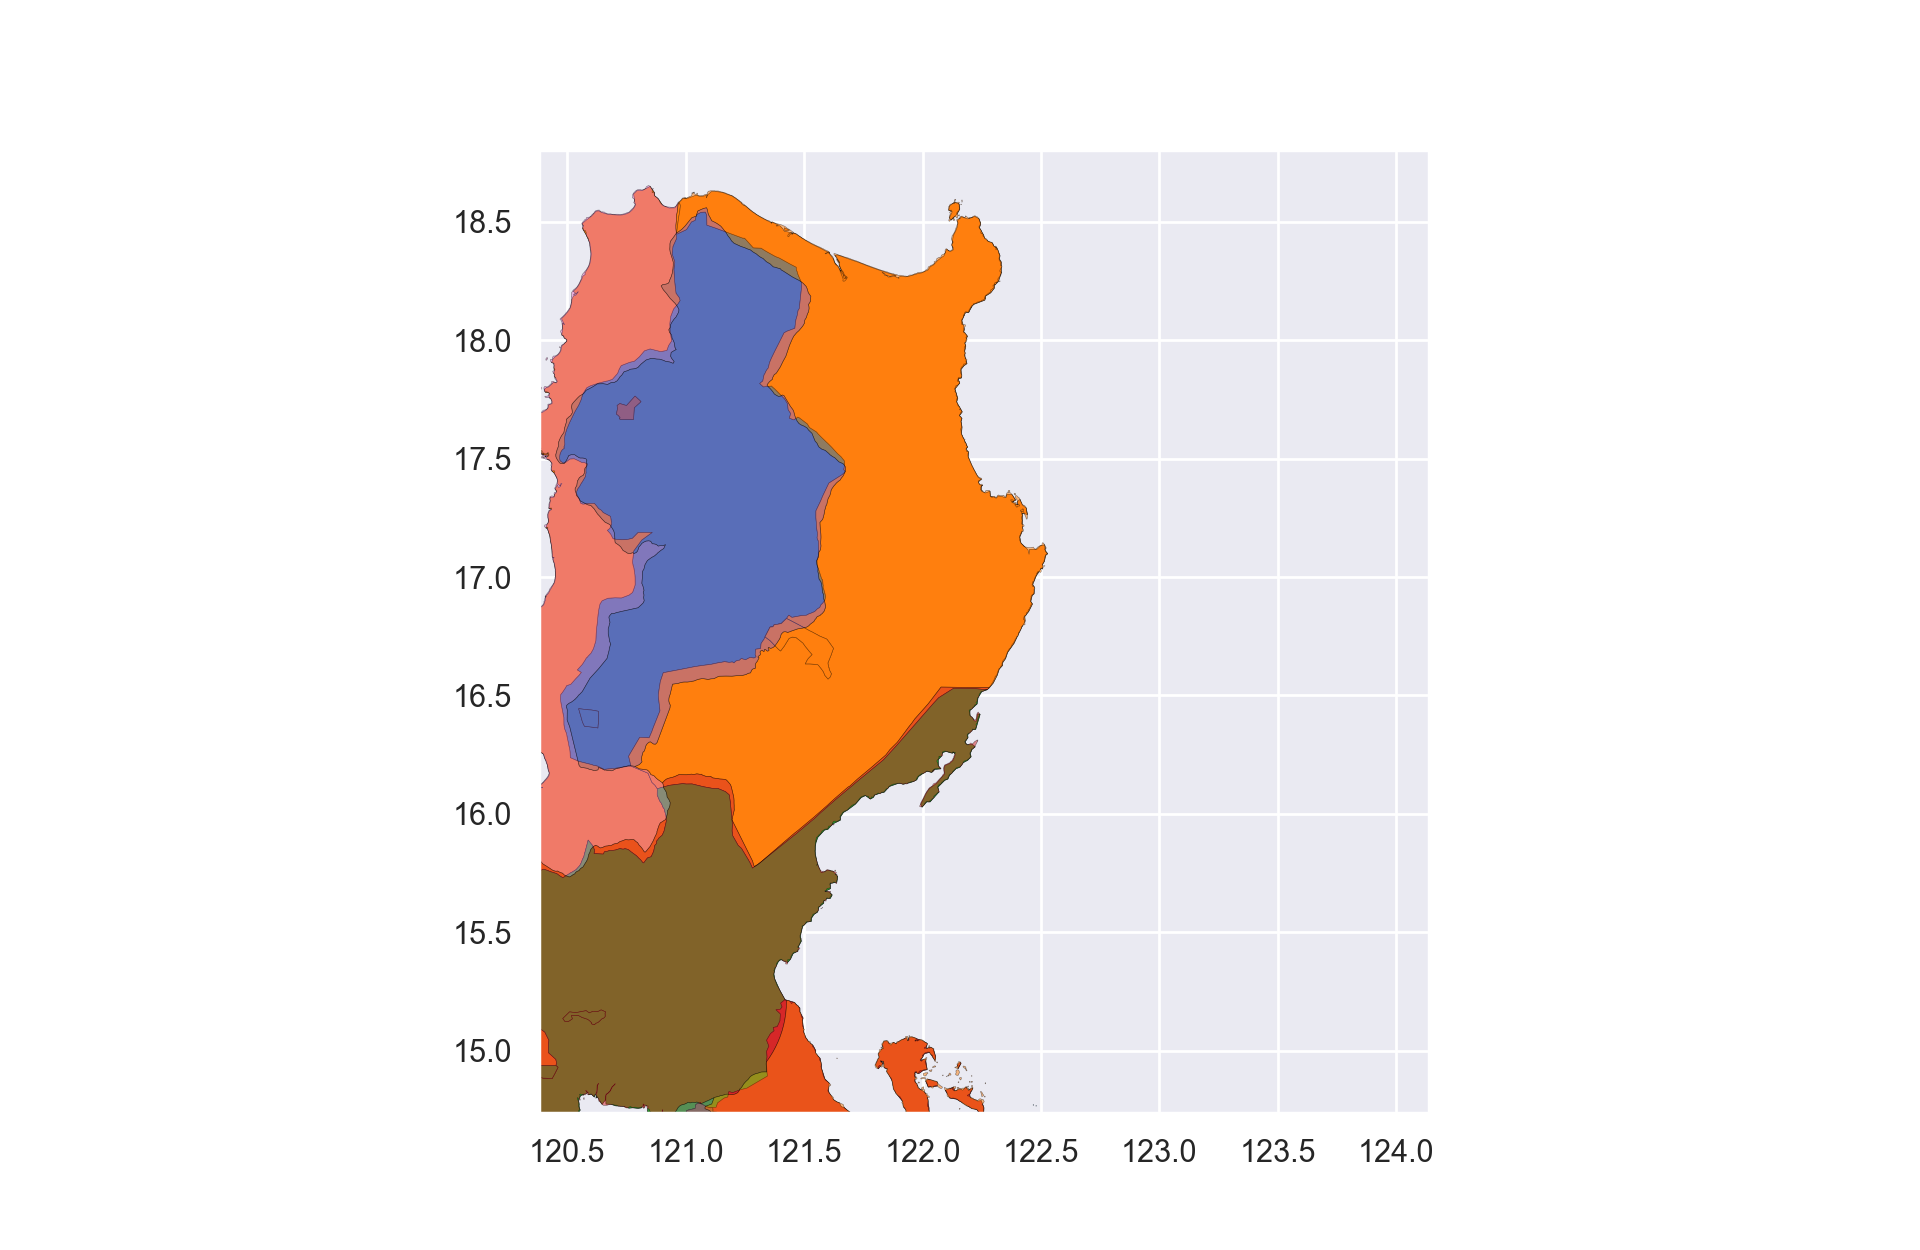

In [191]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
# ax.set_axis_off()
# boundaries.to_crs(kiva_mpi_geo.crs)
hdi_ph_shapes.plot(ax=ax, edgecolor="black", linewidth=0.2, column="region")

boundaries.plot(ax=ax, edgecolor="black", linewidth=0.2, column="DHSREGEN", alpha=0.5)


In [192]:
df.shape

(25074, 5834)